# Análisis de Supervivencia del Titanic con Regresión Logística

Este proyecto utiliza el dataset del Titanic para predecir la supervivencia de los pasajeros. Se aplican los pasos de análisis exploratorio, preprocesamiento, entrenamiento y evaluación utilizando Regresión Logística como modelo de Aprendizaje Supervisado.

## 1. Análisis Exploratorio de Datos

En esta sección se inspecciona el dataset y se analiza la distribución de variables clave.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


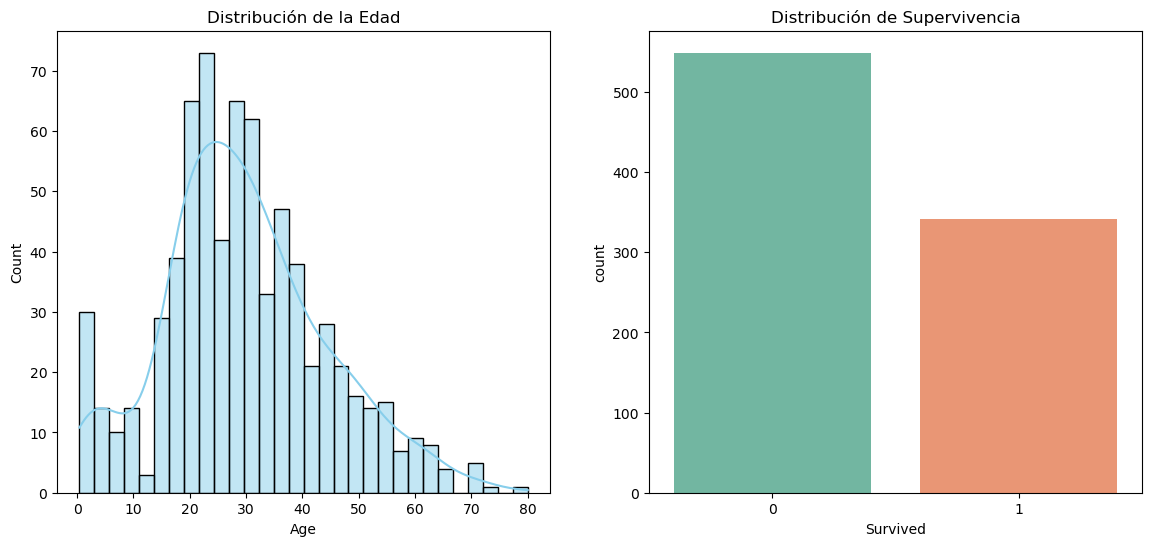

<Figure size 640x480 with 0 Axes>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'Documents/ANALISIS DE DATOS/Tarea 5 - Proyecto Análisis de datos-20241126/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Visualización inicial de datos
titanic_data.head()

# Resumen de datos
titanic_data.info()

# Análisis estadístico
titanic_data.describe(include='all')

# Visualización de distribución de edades y supervivencia
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(titanic_data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Edad')

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', hue='Survived', data=titanic_data, palette='Set2', dodge=False)
plt.legend([], [], frameon=False)  # Eliminamos la leyenda si no es necesaria
plt.title('Distribución de Supervivencia')
plt.show()

plt.tight_layout()
plt.show()


## 2. Preprocesamiento de Datos

Se manejan los valores faltantes y se codifican las variables categóricas.


In [19]:
# Manejo de valores faltantes de forma segura
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data = titanic_data.drop(columns=['Cabin'])
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])


## 3. Selección de Características y División

Se seleccionan las características más relevantes y se divide el dataset en conjuntos de entrenamiento y prueba.


In [22]:
from sklearn.model_selection import train_test_split

# Selección de características y variable objetivo
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = titanic_data_encoded[features]
y = titanic_data_encoded['Survived']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((712, 8), (179, 8))

## 4. Entrenamiento del Modelo

Se utiliza Regresión Logística para entrenar el modelo con los datos de entrenamiento.


In [25]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

## 5. Evaluación del Modelo

Se evalúa el desempeño del modelo con métricas como precisión, recall y F1-score.


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones y evaluación
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(report)
conf_matrix


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



array([[90, 15],
       [19, 55]], dtype=int64)

## 6. Visualización de Resultados

Se presenta la matriz de confusión y se analizan las métricas obtenidas.


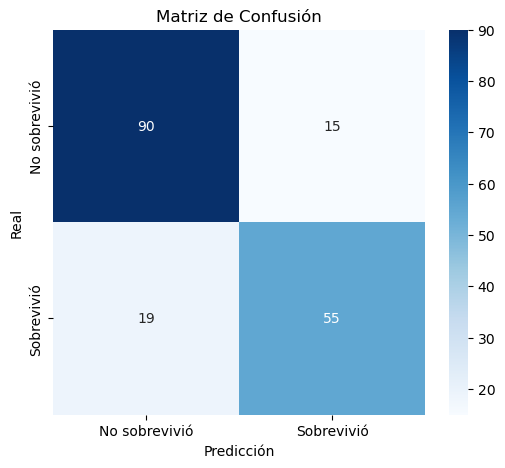

In [31]:
# Matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


## 7. Documentación y Conclusión

### Métricas del modelo:
- Precisión: Se alcanzó un 81% de exactitud en la predicción.
- Recall para clase 1 (sobrevivió): 74%.
- F1-score para clase 1: 76%.

### Observaciones:
- La clase "No sobrevivió" tiene un mejor desempeño en términos de recall y precisión.
- La matriz de confusión muestra que el modelo tiene más errores al predecir sobrevivientes.

### Conclusión:
La Regresión Logística logró un desempeño razonable para el problema. En futuros pasos, se podrían probar otros modelos como Árboles de Decisión o Ajuste de Hiperparámetros.
